In [ ]:
import pandas as pd 
predictions = pd.read_csv('/net/noble/vol1/home/ddesai22/projects/casanovo_nonautoregressive/evaluations/validation_predictions.csv')
true = pd.read_csv('/net/noble/vol1/home/ddesai22/projects/casanovo_nonautoregressive/evaluations/ground_truth_sequences.csv', nrows=1024)

print(predictions.head())

predictions.shape

                                            sequence  \
0           ['L', 'H', 'S', 'L', 'V', 'H', 'H', 'V']   
1           ['L', 'K', 'R', 'E', 'L', 'A', 'T', 'L']   
2      ['G', 'V', 'R', 'R', 'L', 'L', 'A', 'S', 'L']   
3  ['A', 'A', 'L', 'A', 'L', 'L', 'S', 'A', 'A', ...   
4           ['P', 'F', 'A', 'F', 'L', 'H', 'K', 'L']   

                                         per_aa_conf  overall_conf  \
0  0.4039;0.7144;0.9578;0.2470;0.2560;0.1904;0.20...      0.395318   
1  0.9902;0.9911;0.9933;0.7968;0.9812;0.9849;0.65...      0.918820   
2  0.9914;0.7593;0.9277;0.6572;0.5137;0.3027;0.77...      0.682082   
3  0.4659;0.6200;0.9045;0.8903;0.3871;0.1556;0.13...      0.416083   
4  0.9890;0.9903;0.9912;0.9909;0.9906;0.9893;0.99...      0.988003   

                                         spectrum_id  precursor_mz  \
0  ['/net/noble/vol1/home/gstrau2/data/downsample...    961.534668   
1  ['/net/noble/vol1/home/gstrau2/data/downsample...    942.586243   
2  ['/net/noble/vol1/home/gstrau

(1024, 6)

In [2]:
import ast  

results = []
for index, row in predictions.iterrows():
    pred_sequence_list = ast.literal_eval(row["sequence"])  # e.g., ['L', 'H', ...]
    pred_sequence = ''.join(pred_sequence_list)

    pred_confidence = row["overall_conf"]
    ground_truth_sequence = true.iloc[index]["ground_truth"]

    correct = int(pred_sequence == ground_truth_sequence)
    results.append({
        "Score": pred_confidence,
        "Correct": correct,
        "True Sequence": ground_truth_sequence,
        "Predicted Sequence": pred_sequence
    })

df_results = pd.DataFrame(results)
print(df_results)

df_sorted = df_results.sort_values(by="Score", ascending=False)
df_sorted.to_csv("sorted_scores.csv", index=False, sep='\t')

df_wrong = df_sorted[df_sorted["Correct"] == 0]
df_wrong.to_csv("high_confidence_wrong_predictions.tsv", index=False, sep='\t')




         Score  Correct True Sequence Predicted Sequence
0     0.395318        0     ALHSALHTL           LHSLVHHV
1     0.918820        1      LKRELATL           LKRELATL
2     0.682082        0     VGRLRLASL          GVRRLLASL
3     0.416083        0   RPYAPLNANAL       AALALLSAANAA
4     0.988003        1      PFAFLHKL           PFAFLHKL
...        ...      ...           ...                ...
1019  0.919864        0     TRLQQLTNL          TRLLQLTNL
1020  0.515919        0   HRPSLQLDTAL         RATDLKLDRF
1021  0.559579        0     RLLQQVSQL          LLLLQLSQY
1022  0.679576        0      VELQTPKL           VELQTLKL
1023  0.744656        0     GRFVTVQTL          RRRVTVQTL

[1024 rows x 4 columns]


[0.9922577  0.99224794 0.99217347 ... 0.21436089 0.19173334 0.15697926]
[1 1 1 ... 0 0 0]


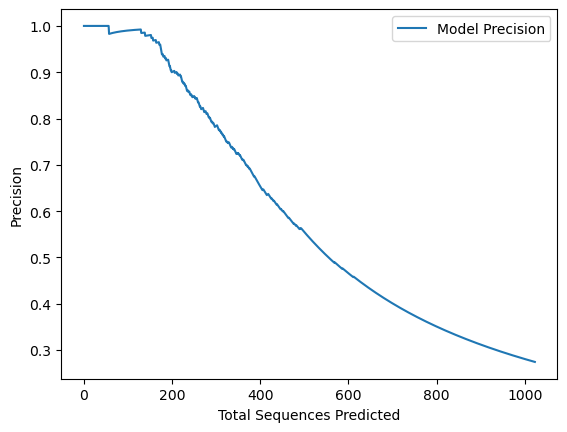

In [3]:
import matplotlib.pyplot as plt
import numpy as np

scores = df_results['Score'].values
labels = df_results['Correct'].values  


sorted_indexes = np.argsort(scores)[::-1]
scores = scores[sorted_indexes]
labels = labels[sorted_indexes]

print(scores)
print(labels)
    
precisions= []
num_predictions = []
total = len(scores)
tp = 0

for i in range(total):
    tp += labels[i]
    precision = tp / (i + 1)
    precisions.append(precision)
    num_predictions.append(i)

plt.plot(num_predictions, precisions, label="Model Precision")
plt.xlabel('Total Sequences Predicted')  
plt.ylabel('Precision')


plt.legend()




In [4]:
overall_accuracy = tp/total
print(overall_accuracy)

0.2744140625
